In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import random

In [2]:
csv = pd.read_csv('pistachios.csv', index_col = 0)

In [3]:
csv.pistachio_type.value_counts()

0    1232
1     916
Name: pistachio_type, dtype: int64

In [4]:
#Create list of random indexes to display random images
random.seed(123)
random_image_index = np.random.randint(csv.shape[0], size=10)

In [5]:
images = []
for name in csv.filename:
    images.append(plt.imread('Pistachio_Image_Dataset\Pistachio_Image_Dataset\\' + name))

In [6]:
grey_images = []
for img in images:
    grey_images.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

In [7]:
percent_area = []
for img in grey_images:
    percent_area.append(np.count_nonzero(img)/(img.shape[0]*img.shape[1]))

In [8]:
csv['percent_area'] = percent_area

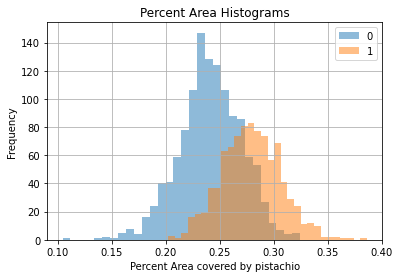

In [9]:
plt.hist(csv[csv.pistachio_type == 0].percent_area, bins = 30, alpha = 0.5, label = 0)
plt.hist(csv[csv.pistachio_type == 1].percent_area, bins = 30, alpha = 0.5, label = 1)
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Percent Area covered by pistachio')
plt.ylabel('Frequency')
plt.title('Percent Area Histograms')
plt.show()

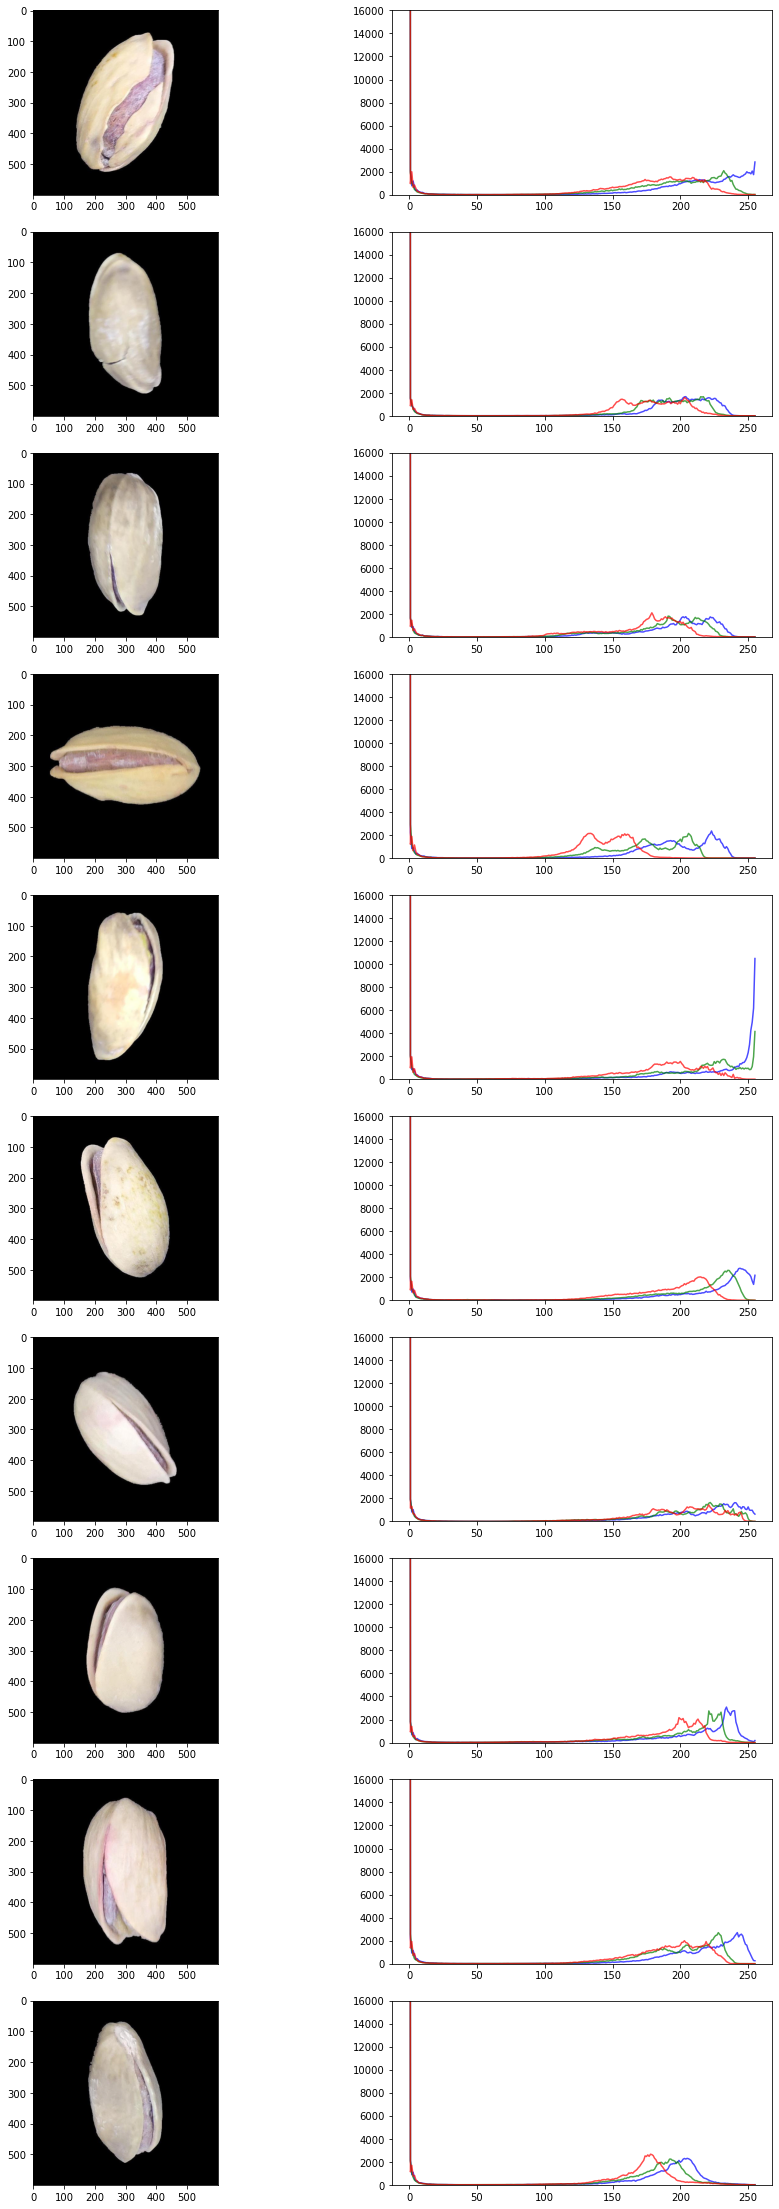

In [10]:
color_hist_images = [images[i] for i in random_image_index]
fig, ax = plt.subplots(len(random_image_index),2, figsize = (15, 40))


for j, img in enumerate(color_hist_images):
    
    ax[j,0].imshow(img)
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        ax[j,1].plot(histr,color = col, alpha = 0.7)
        ax[j,1].set_ylim([0, 16000])
plt.show()

In [11]:
#Rescale and blur
rescaled_images = []
for img in grey_images:
    rescaled_images.append(cv2.GaussianBlur(cv2.resize(img, (200, 200)), (3, 3), 0))

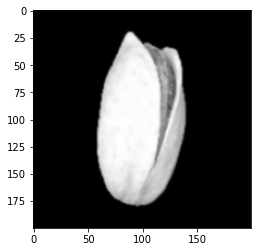

In [12]:
plt.imshow(rescaled_images[345], cmap = 'gray')

In [13]:
#Edge detection
def edge_detect(img):
    sobelx = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
    sobely = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
    sobelxy = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
    canny = cv2.Canny(img,200,750)
    
    return canny

edge_images = []
for img in rescaled_images:
    edge_images.append(edge_detect(img))

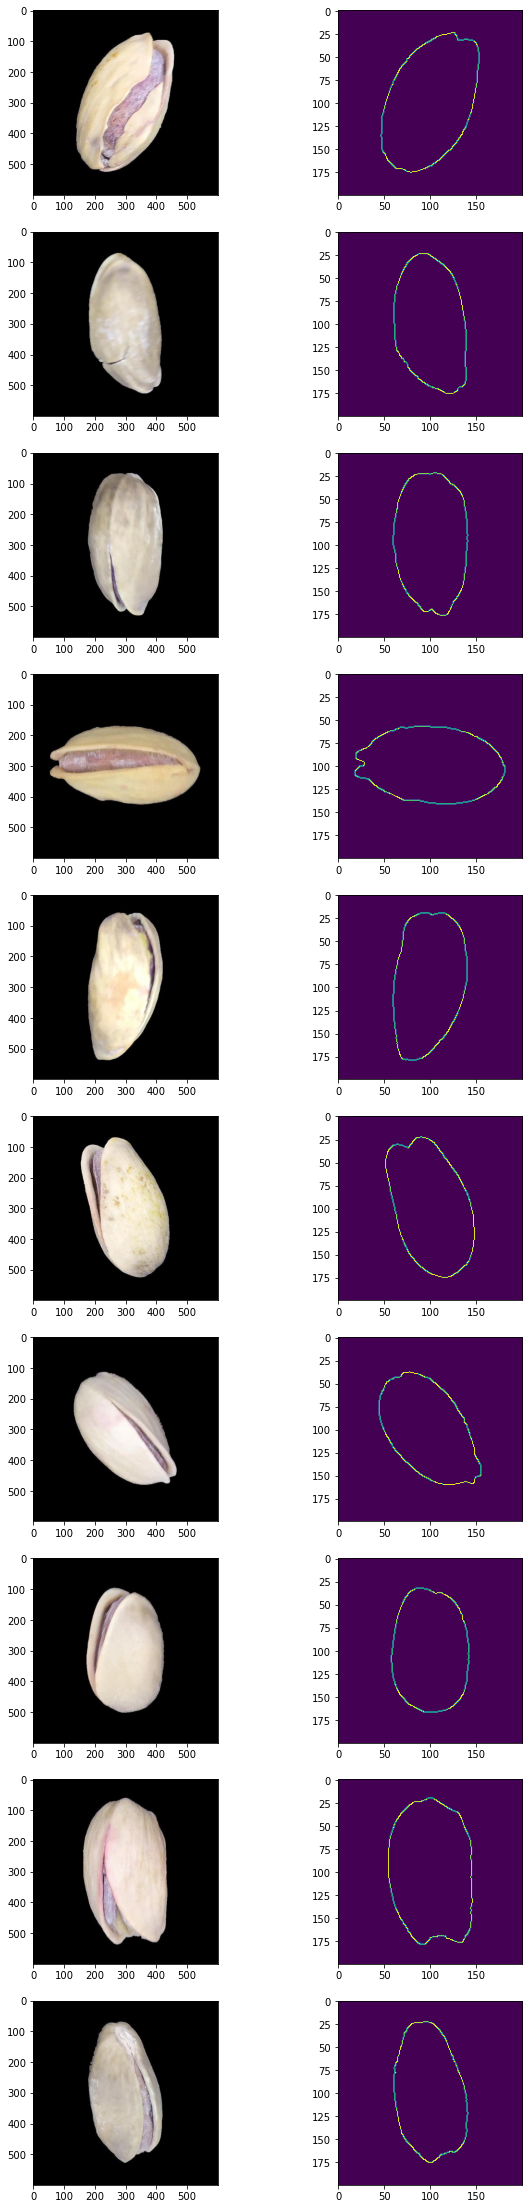

In [14]:
fig, ax = plt.subplots(len(random_image_index),2, figsize = (10, 40))

for j, index in enumerate(random_image_index):
    ax[j,0].imshow(images[index])
    ax[j,1].imshow(edge_images[index])

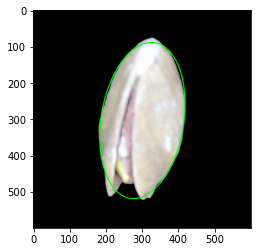

In [15]:
index = 654

ret,thresh = cv2.threshold(grey_images[index],50,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[1]
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(images[654],ellipse,(0,255,0),2)

plt.imshow(im, cmap = 'gray')

In [16]:
brightened_grey_images = []
for img in grey_images:
    brightened_grey_images.append(np.where(img<25, 0, 255))

In [23]:
def fit_ellipse(img):
        
    out_img = img.copy()            
    
    try:
        
        ret,thresh = cv2.threshold(out_img,50,255,0)
        contours,hierarchy = cv2.findContours(thresh, 1, 2)

        cnt = contours[0]
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt,True)
        ellipse = cv2.fitEllipse(cnt)
        return cv2.ellipse(out_img,ellipse,(255),2)
    
    except cv2.error as e:
        pass

ellpise_images = []
for img in rescaled_images:
    ellpise_images.append(fit_ellipse(img))

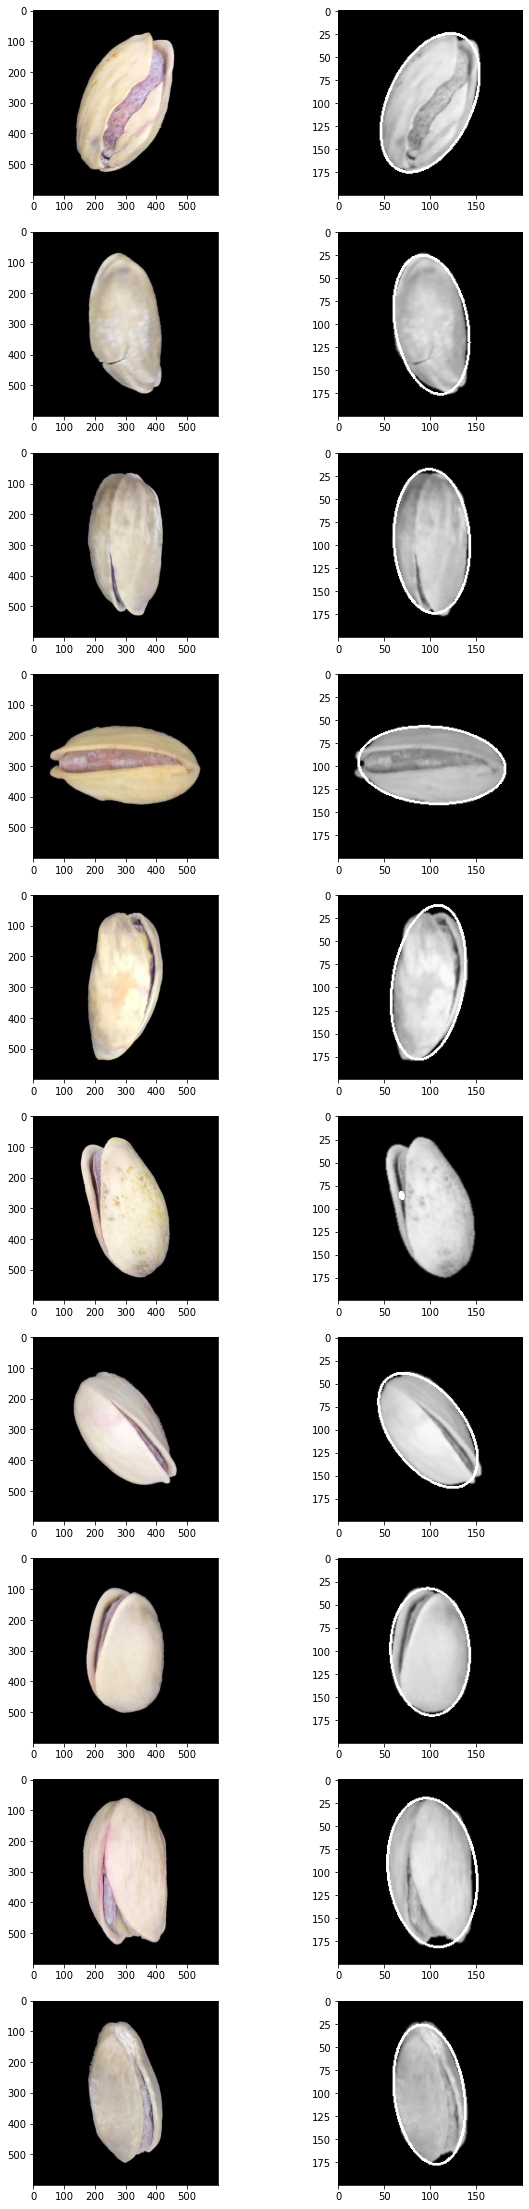

In [24]:
fig, ax = plt.subplots(len(random_image_index),2, figsize = (10, 40))

for j, index in enumerate(random_image_index):
    
    try:
        ax[j,0].imshow(images[index])
        ax[j,1].imshow(ellpise_images[index], cmap = 'gray')
        
    except:
        pass
        